##### Task 2: Exploration

In [2]:
#Import the data cleaned in the previous task 'cleanbankdata.csv' to a dataframe
import csv
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
bankdata = pd.read_csv('cleanbankdata.csv')
bankdata.columns

Index([u'Unnamed: 0', u'age', u'job', u'marital', u'education', u'default',
       u'housing', u'loan', u'contact', u'month', u'day_of_week', u'duration',
       u'campaign', u'pdays', u'previous', u'poutcome', u'emp_var_rate',
       u'cons_price_idx', u'cons_conf_idx', u'euribor3m', u'nr_employed',
       u'y'],
      dtype='object')

In [3]:
# bar charts of counts of all observations by vaules in categorical columns 

Text(0.5,0,u'Level of education')

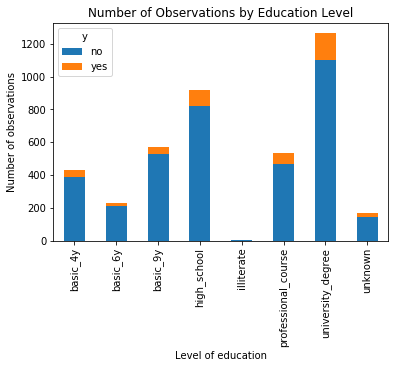

In [4]:
#Chart for number of obervations by education
bankdata.groupby(['y'])['education'].value_counts().unstack('y').plot(kind='bar', stacked = True)
plt.title('Number of Observations by Education Level')
plt.ylabel('Number of observations')
plt.xlabel('Level of education')

Text(0.5,0,u'Job type')

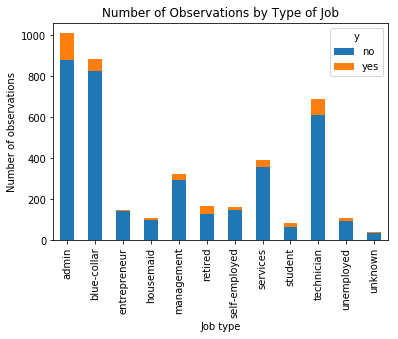

In [5]:
#Chart for number of obervations by Job
bankdata.groupby(['y'])['job'].value_counts().unstack(['y']).plot(kind='bar', stacked = True)
plt.title('Number of Observations by Type of Job')
plt.ylabel('Number of observations')
plt.xlabel('Job type')

Text(0.5,0,u'Marital Status')

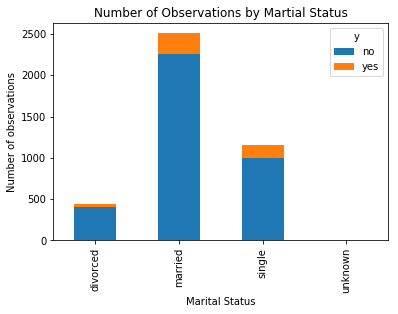

In [6]:
#Chart for number of obervations by Marital Status
bankdata.groupby(['y'])['marital'].value_counts().unstack('y').plot(kind='bar', stacked = True)
plt.title('Number of Observations by Martial Status')
plt.ylabel('Number of observations')
plt.xlabel('Marital Status')

Text(0.5,0,u'Credit Default Status')

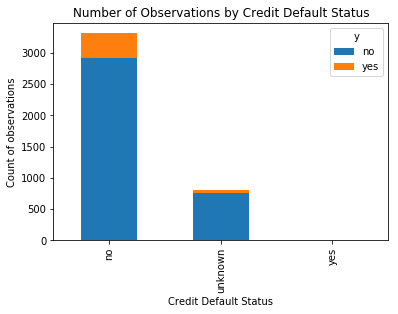

In [7]:
#Chart for number of obervations by Credit Default Status
bankdata.groupby(['y'])['default'].value_counts().unstack('y').plot(kind='bar', stacked = True)
plt.title('Number of Observations by Credit Default Status')
plt.ylabel('Count of observations')
plt.xlabel('Credit Default Status')

Text(0.5,0,u'Contact Type')

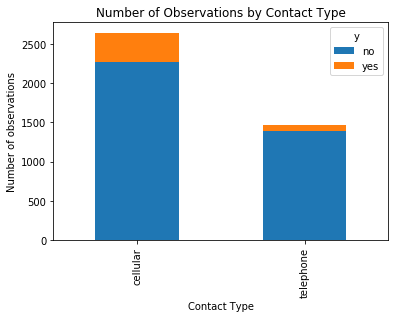

In [8]:
#Chart for number of obervations by Contact Type
bankdata.groupby(['y'])['contact'].value_counts().unstack('y').plot(kind='bar', stacked = True)
plt.title('Number of Observations by Contact Type')
plt.ylabel('Number of observations')
plt.xlabel('Contact Type')

Text(0.5,0,u'Housing Loan Status')

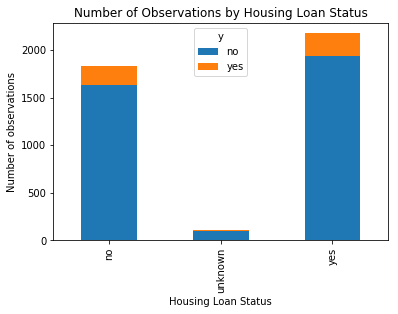

In [9]:
#Chart for number of obervations by Housing Loan Status
bankdata.groupby(['y'])['housing'].value_counts().unstack('y').plot(kind='bar', stacked = True)
plt.title('Number of Observations by Housing Loan Status')
plt.ylabel('Number of observations')
plt.xlabel('Housing Loan Status')

Text(0.5,0,u'Last Contacted Month')

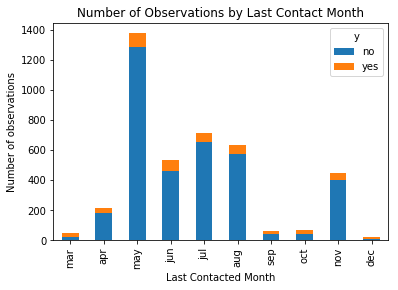

In [10]:
#Plot for contact month vs number of obervations.
#Let us order the months accordingly first
order = ['mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
bankdata.groupby(['y'])['month'].value_counts().unstack('y').loc[order].plot(kind='bar', stacked = True)
plt.title('Number of Observations by Last Contact Month')
plt.ylabel('Number of observations')
plt.xlabel('Last Contacted Month')

Text(0.5,0,u'Last Contacted Day of Week')

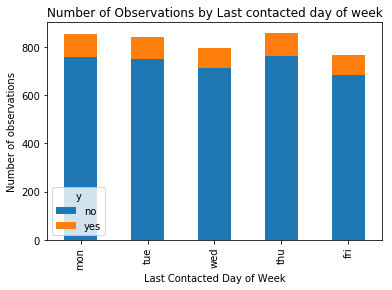

In [11]:
#Plot for contact week vs number of obervations.
#Let us order the weeks accordingly first
order = ['mon', 'tue', 'wed','thu','fri']
bankdata.groupby(['y'])['day_of_week'].value_counts().unstack('y').loc[order].plot(kind='bar', stacked = True)
plt.title('Number of Observations by Last contacted day of week')
plt.ylabel('Number of observations')
plt.xlabel('Last Contacted Day of Week')

In [12]:
# Boxplots for numerical values

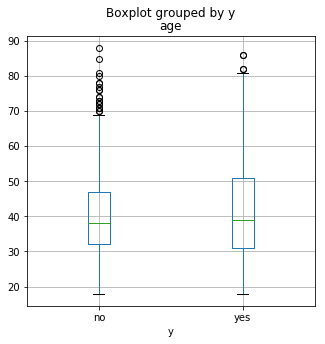

In [13]:
#Boxplot for age grouped by y
bankdata.boxplot(column='age', by='y', figsize=[5,5])

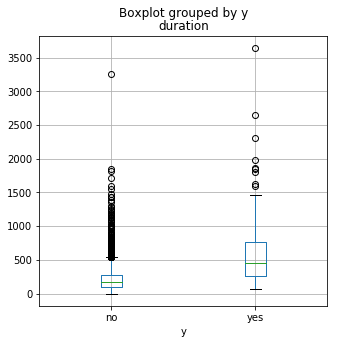

In [14]:
#Boxplot for duration grouped by y
bankdata.boxplot(column='duration', by='y', figsize=[5,5])

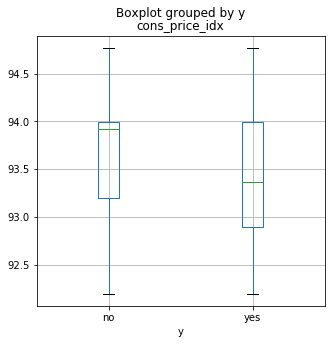

In [15]:
#Boxplot for cons_price_idx grouped by y
bankdata.boxplot(column='cons_price_idx', by='y', figsize=[5,5])

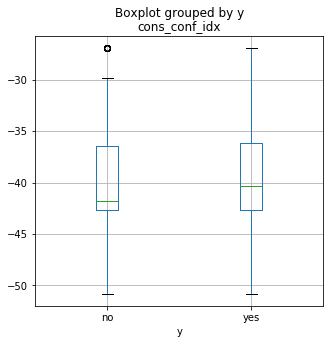

In [16]:
#Boxplot for cons_conf_idx grouped by y
bankdata.boxplot(column='cons_conf_idx', by='y', figsize=[5,5])

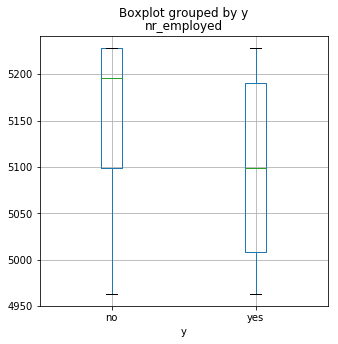

In [17]:
#Boxplot for nr_employed grouped by y
bankdata.boxplot(column='nr_employed', by='y', figsize=[5,5])

Text(0.5,0,u'Age')

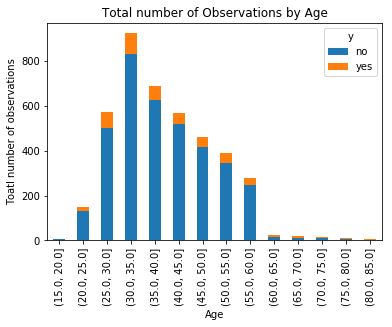

In [18]:
# Hypothesis 1: People from age groups 25-45 are targeted more and have a higher success rate during the campaign.
bankdata['age_group'] = pd.cut(bankdata.age, bins=[g for g in range(10, 90, 5)], include_lowest=True)
bankdata.groupby(['y'])['age_group'].value_counts().unstack(['y']).plot(kind='bar', stacked = True)
plt.title('Total number of Observations by Age')
plt.ylabel('Toatl number of observations')
plt.xlabel('Age')

Text(0.5,0,u'Age')

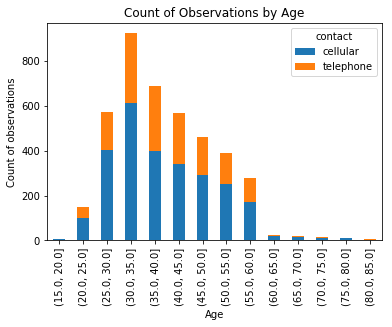

In [19]:
# Hypothesis 2: Communication through cellular has more success rate by age group
bankdata['age_group'] = pd.cut(bankdata.age, bins=[g for g in range(10, 90, 5)], include_lowest=True)
bankdata.groupby(['contact'])['age_group'].value_counts().unstack(['contact']).plot(kind='bar', stacked = True)
plt.title('Count of Observations by Age')
plt.ylabel('Count of observations')
plt.xlabel('Age')

In [20]:
# Hypothesis 3: Customers can be grouped into premium and normal customers.
# Customers with better backgrounds are more likely to be successful and can be called premium customers. 
# Premium customers can be classified as below.
# job in admin,blue-collar,technician or retired
# marital status as married or single
# education level with atleast high_school, professional_course or university_degree
# has no credit defaults
premium_customers = (((bankdata['job'] == 'admin') | (bankdata['job'] == 'technician') | (bankdata['job'] == 'retired'))
            & ((bankdata['marital'] == 'married') | (bankdata['marital'] == 'single'))
            & ((bankdata['education'] == 'high_school') | (bankdata['education'] == 'professional_course') | (bankdata['education'] == 'university_degree'))
            & ((bankdata['default'] == 'no')))

In [21]:
bankdata.groupby(premium_customers).y.value_counts()

       y  
False  no     2588
       yes     269
True   no     1078
       yes     182
Name: y, dtype: int64

Text(0.5,1,u'Percentage of Normal Customers calls by Call Success')

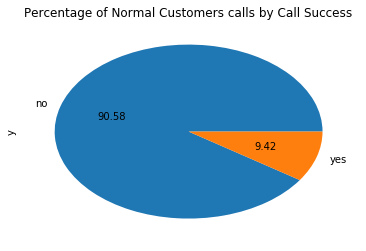

In [22]:
bankdata.loc[premium_customers == False].y.value_counts().plot(kind = 'pie', autopct = '%.2f')
plt.title('Percentage of Normal Customers calls by Call Success')

Text(0.5,1,u'Percentage of Premium Customers calls by Call Success')

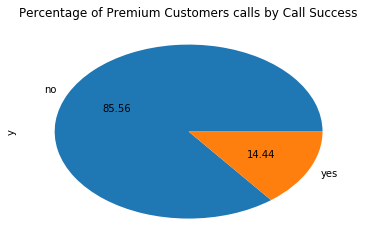

In [23]:
bankdata.loc[premium_customers == True].y.value_counts().plot(kind = 'pie', autopct = '%.2f')
plt.title('Percentage of Premium Customers calls by Call Success')

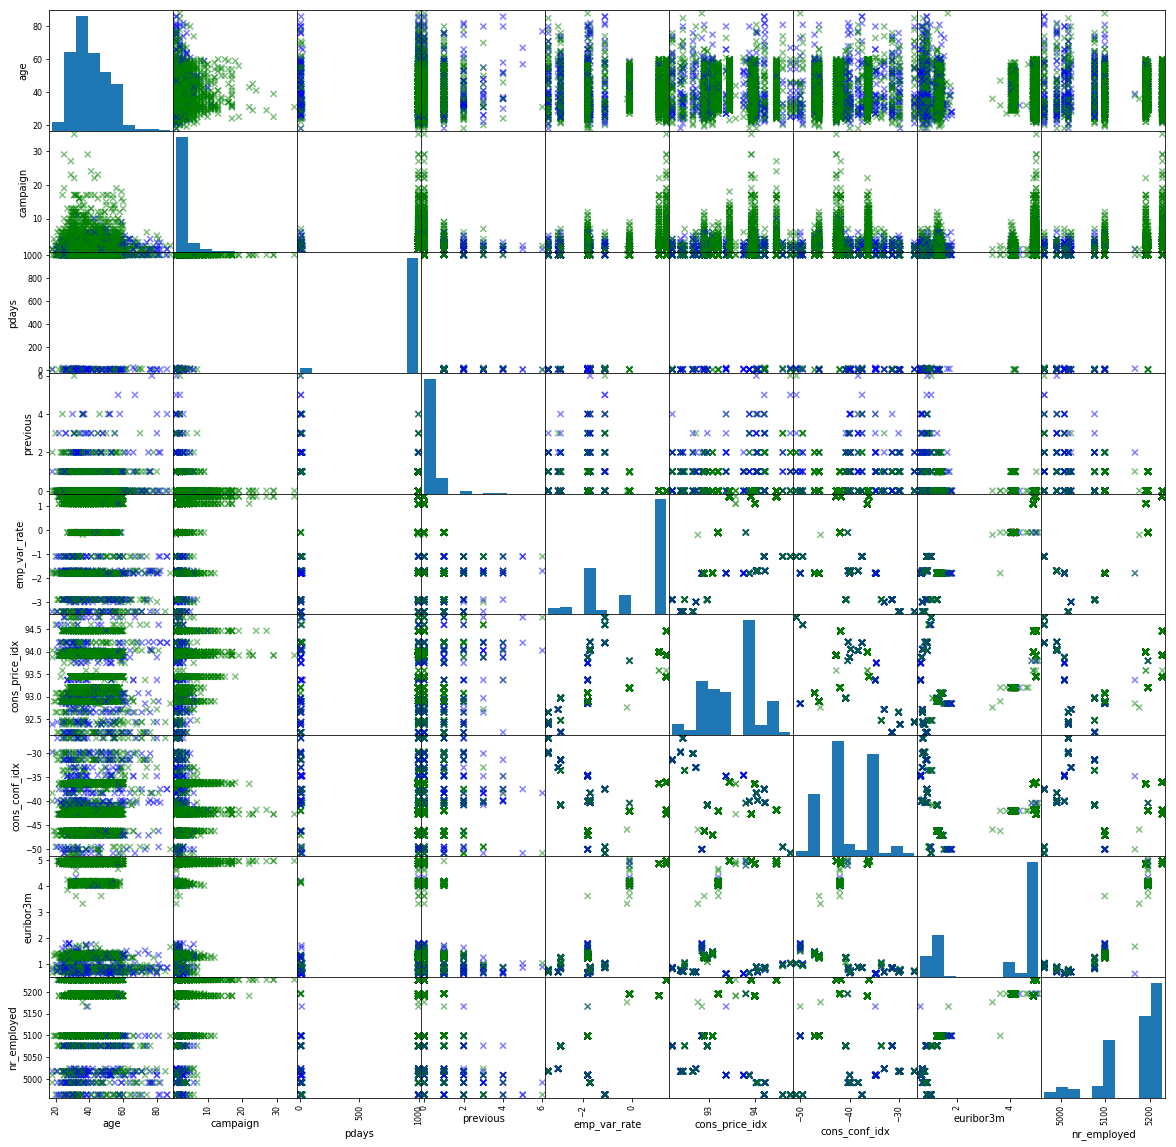

In [24]:
## Step 3:
#Scatter matrix for all numerical columns by y.
colors=['blue','green']
success = pd.Series([1,0], index=['no', 'yes'])
bankdata['success']=bankdata.y.map(success)
scatter_matrix(bankdata[['age','campaign','pdays','previous','poutcome','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed',]],figsize=[20,20],marker='x',c=bankdata.success.apply(lambda x:colors[x]))
plt.show()